# DATA SCIENCE SCHOOL :: Introduction to ML in Python
### An Intensive Python ML Course
## Prerequisites

[&larr; Back to course webpage](http://datakolektiv.com/app_direct/introdsnontech/)

![](../img/IntroMLPython_Head.png)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SCHOOL :: Introduction to ML in Python course.

### Goran S. Milovanović, PhD
<b>DataKolektiv, Chief Scientist & Owner</b>

### Aleksandar Cvetković, PhD
<b>DataKolektiv, Consultant</b>

![](../img/DK_Logo_100.png)

## Introduction to Probability and Statistics with `numpy`

- Binomial Distribution and Likelihood
- Normal (Gaussian) Distribution
- Covariance and Correlation

In [1]:
# - libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# - set RGN sed
np.random.seed(42) 

#### Tossing a coin in `numpy`. Theoretical and experimental probabilities.  

Imagine I have a **fair coin**: the one that lands Heads and Tails with equal probabilities P(H) = P(T) = 1/2.

In [2]:
tosses = np.array([1,0,1,0,1,0,0,1,0,0])
print(tosses)

[1 0 1 0 1 0 0 1 0 0]


In [3]:
np.unique(tosses, return_counts=True)[1]

array([6, 4])

Uhm, but I have already **assumed* that we will be tossing a fair coin? Four heads, six tails, how come? Is this really a fair coin? The answer is: it still might be. Let's see.

In [4]:
outcomes = np.array([0,1])
tosses = np.random.choice(outcomes, 10, replace=True, p=[.5, .5])
print(tosses)
print(np.unique(tosses, return_counts=True)[1]/tosses.size)

[0 1 1 1 0 0 0 1 1 1]
[0.4 0.6]


And again:

In [5]:
outcomes = np.array([0,1])
tosses = np.random.choice(outcomes, 10, replace=True, p=[.5, .5])
print(tosses)
print(np.unique(tosses, return_counts=True)[1]/tosses.size)

[0 1 1 0 0 0 0 1 0 0]
[0.7 0.3]


In [6]:
outcomes = np.array([0,1])
num_exps = 1000
stat_exp_1 = []
for i in range(num_exps):
    tosses = np.random.choice(outcomes, 100, replace=True, p=[.5, .5])
    result = np.array([(tosses==0).sum(), (tosses==1).sum()])/tosses.size
    result = {'P_T':result[0], 'P_H':result[1]}
    stat_exp_1.append(result)
stat_exp_1 = pd.DataFrame(stat_exp_1)    
stat_exp_1.head(20)

,P_T,P_H
0,0.51,0.49
1,0.49,0.51
2,0.43,0.57
3,0.48,0.52
4,0.46,0.54
5,0.52,0.48
6,0.58,0.42
7,0.42,0.58
8,0.61,0.39
9,0.49,0.51


Let's visualize the result of this statistical experiment:

array([[<AxesSubplot:title={'center':'P_T'}>,
        <AxesSubplot:title={'center':'P_H'}>]], dtype=object)

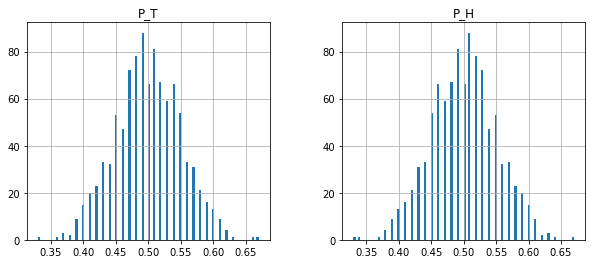

In [7]:
# - matplotlib figure size
plt.rcParams['figure.figsize'] = [10, 4]

stat_exp_1.hist(bins=100)

Ok, now let' see what happens with 10,000 statistical experiments with a fair coin:

array([[<AxesSubplot:title={'center':'P_T'}>,
        <AxesSubplot:title={'center':'P_H'}>]], dtype=object)

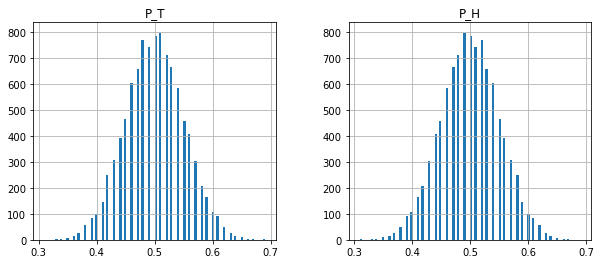

In [8]:
# - matplotlib figure size
plt.rcParams['figure.figsize'] = [10, 4]

outcomes = np.array([0,1])
num_exps = 10000
stat_exp_1 = []
for i in range(num_exps):
    tosses = np.random.choice(outcomes, 100, replace=True, p=[.5, .5])
    result = np.array([(tosses==0).sum(), (tosses==1).sum()])/tosses.size
    result = {'P_T':result[0], 'P_H':result[1]}
    stat_exp_1.append(result)
stat_exp_1 = pd.DataFrame(stat_exp_1)
stat_exp_1.hist(bins=100)

What about 100,000 experiments?

array([[<AxesSubplot:title={'center':'P_T'}>,
        <AxesSubplot:title={'center':'P_H'}>]], dtype=object)

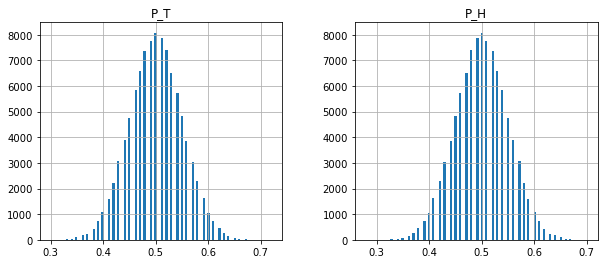

In [9]:
# - matplotlib figure size
plt.rcParams['figure.figsize'] = [10, 4]

outcomes = np.array([0,1])
num_exps = 100000
stat_exp_1 = []
for i in range(num_exps):
    tosses = np.random.choice(outcomes, 100, replace=True, p=[.5, .5])
    result = np.array([(tosses==0).sum(), (tosses==1).sum()])/tosses.size
    result = {'P_T':result[0], 'P_H':result[1]}
    stat_exp_1.append(result)
stat_exp_1 = pd.DataFrame(stat_exp_1)
stat_exp_1.hist(bins=100)

**Theoretical probability**: when we **know** that some stochastic system produces an outcome with some particular probability. 

**Experimental probability**: when we **estimate** that some stochastic system produces an outcome with some particular probability from observed data.

In [10]:
stat_exp_1['P_H'].mean()

0.5000201999999925

In [11]:
stat_exp_1['P_T'].mean()

0.4999798000000076

#### Reverse engineering the coin in `numpy`

In all my previous statistical experiments, I have **assumed** that the coin is fair, e.g. P(H) = P(T) = .5, look:

```
tosses = np.random.choice(outcomes, 100, replace=True, p=[.5, .5])
```

I have used numerical simulations of coin tosses to demonstrate that with increasing number of experiments I get to estimate the **known** probabilities of P(H) and P(T) better and better.

However, we typically **do not know** the theoretical probability of a random event... *Example:* the CTR of some social media post.

CTR (Click-Through Rate) is like a coin toss: a post is clicked or not clicked upon each served impression.
We can thus threat the CTR like a coin toss: P(H) = P(Clicked) is "post clicked", P(T) = P(Not clicked) is "not clicked".
Then we can say that P(Clicked) is some latent, essential characteristic of post. 

Imagine we have a set of observations for a particular social media post: 1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0.., where 1 = Clicked and 0 = Not clicked. How do we estimate the CTR of the post from these data?

Easy, right: sum up the vector of observations and divide by its length. But wait. There's more to it.

I have just invented some social media post with a CTR of .3, and estimated its experimental probability to be .3035; that is the best estimate that I currently have. What if I want to test a set of *hypotheses* about the CTR of this post? What, for example, if I am intersted to learn about the *probability of this post having a CTR of .25* instead? Let's use a simpler, smaller set of observations to begin with.

Imagine we toss **a fair coin** with P(H)=.5 twice and observe two Heads. The probability of observing two heads with P(H)=.5 is:

`.5 * .5 = .25` 

But what if the coin was not fair, and instead had a probability of P(H)=.3? Then:

`.3 * .3 = 0.09`

And what if the coin had P(H) = .7?

`.7 * .7 = 0.49`

With P(H) = .9 we get:

`.9 * .9 = 0.81`

and it seems intuitive and logical: if we have observed a sample - *however small it was* - of all heads (and are assuming that we have observed two Heads from two tosses here), it makes sense that we are dealing with a coin that almost always lands Heads. 

Let's express this intuition visually. First, we need a function to compute the probability that a coin with a certain P(H) produced the data.

In [12]:
outcomes = np.array([0,1])
clicks = np.random.choice(outcomes, 10000, replace=True, p=[.7, .3])
ctr = np.array([(clicks==1).sum()])/clicks.size
print(ctr)

[0.2989]


In [13]:
def parameter(x, par):
    if x==1:
        return(par)
    elif x==0:
        return(1-par)
    else:
        return(np.nan)
pars = np.vectorize(parameter)
data = np.array([1, 1, 0])
print(pars(data, .25))

[0.25 0.25 0.75]


In [14]:
def likelihood(x):
    return(np.prod(x))
print(likelihood(pars(data, .25)))

0.046875


Nice. Now:

In [15]:
test_parameters = np.linspace(0, 1, 1000)
print(test_parameters[0:100])

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

In [16]:
# - setup
likelihood_frame = []
outcomes = np.array([0,1])
data = np.random.choice(outcomes, 1000, replace=True, p=[.7, .3])

# - iterate
for pr in range(len(test_parameters)):
    d = likelihood(pars(data,test_parameters[pr]))
    d = {'P_H':test_parameters[pr], 'Likelihood':d}
    likelihood_frame.append(d)

# - compose
likelihood_frame = pd.DataFrame(likelihood_frame)

# - inspect
likelihood_frame.head(10)

,P_H,Likelihood
0,0.000000,0.0
1,0.001001,0.0
2,0.002002,0.0
3,0.003003,0.0
4,0.004004,0.0
5,0.005005,0.0
6,0.006006,0.0
7,0.007007,0.0
8,0.008008,0.0
9,0.009009,0.0


<AxesSubplot:xlabel='P_H'>

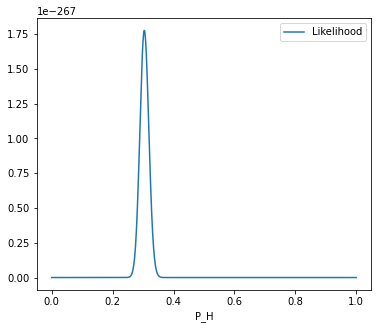

In [17]:
# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

likelihood_frame.plot(x='P_H', y='Likelihood')

Let's ask explicitly:

In [18]:
maximum_likelihood = likelihood_frame.idxmax()[1]
likelihood_frame['P_H'][maximum_likelihood]

0.30430430430430433

And what if P(H) was .85?

In [19]:
# - setup
likelihood_frame = []
outcomes = np.array([0,1])
data = np.random.choice(outcomes, 1000, replace=True, p=[.15, .85])

# - iterate
for pr in range(len(test_parameters)):
    d = likelihood(pars(data,test_parameters[pr]))
    d = {'P_H':test_parameters[pr], 'Likelihood':d}
    likelihood_frame.append(d)

# - compose
likelihood_frame = pd.DataFrame(likelihood_frame)

# - inspect
likelihood_frame.head(10)

,P_H,Likelihood
0,0.000000,0.0
1,0.001001,0.0
2,0.002002,0.0
3,0.003003,0.0
4,0.004004,0.0
5,0.005005,0.0
6,0.006006,0.0
7,0.007007,0.0
8,0.008008,0.0
9,0.009009,0.0


In [20]:
maximum_likelihood = likelihood_frame.idxmax()[1]
likelihood_frame['P_H'][maximum_likelihood]

0.8558558558558559

Pick any arbitrary observation

<AxesSubplot:xlabel='P_H'>

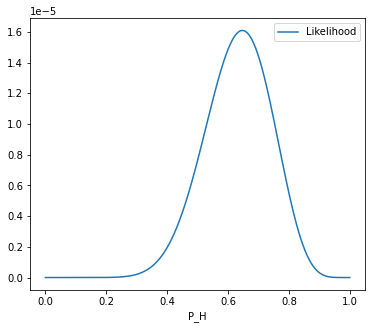

In [21]:
# - setup
likelihood_frame = []
data = np.array([1,1,0,1,1,1,1,1,0,0,0,0,1,1,0,1,1])

# - iterate
for pr in range(len(test_parameters)):
    d = likelihood(pars(data,test_parameters[pr]))
    d = {'P_H':test_parameters[pr], 'Likelihood':d}
    likelihood_frame.append(d)

# - compose
likelihood_frame = pd.DataFrame(likelihood_frame)

# - inspect
likelihood_frame.head(10)

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

# - plot
likelihood_frame.plot(x='P_H', y='Likelihood')

In [22]:
maximum_likelihood = likelihood_frame.idxmax()[1]
likelihood_frame['P_H'][maximum_likelihood]

0.6466466466466466

In [23]:
np.unique(data, return_counts=True)[1]

array([ 6, 11])

Good. What have we learned?

To estimate the parameter of a simple statistical model from data - a coin, in our case, a simple stochastic system with two outcome states only - we need to find the **maximum of its likelihood function given the observed data**.

Next time we will describe more formally some of the notions introduced in this Session.

For our example with the `HH` minimal observations - tossing a coin two times and observing two Heads in a row - the likelihood function is:

<AxesSubplot:xlabel='P_H'>

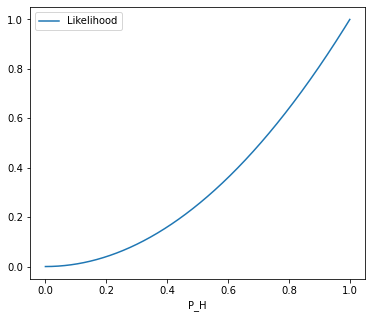

In [24]:
# - setup
likelihood_frame = []
data = np.array([1,1])

# - iterate
for pr in range(len(test_parameters)):
    d = likelihood(pars(data,test_parameters[pr]))
    d = {'P_H':test_parameters[pr], 'Likelihood':d}
    likelihood_frame.append(d)

# - compose
likelihood_frame = pd.DataFrame(likelihood_frame)

# - inspect
likelihood_frame.head(10)

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

# - plot
likelihood_frame.plot(x='P_H', y='Likelihood')

Of course: **however small the sample size**, the sample represents **just everything that we know** about a coin; if we observe all heads, like in: `HH`, then the most probable coin that could have produced the result is definitely the one that yields Heads all the time!

### Binomial Probability Functions and Random Numbers

We will now review the Binomial Probability Mass Function (PMF) and Cumulative Distribution Function (CDF) and random number generation. 

The Binomial distribution models the following, basic statistical experiment: (1) toss a coin that has a probability $p$ for Heads; repeat the experiment $n$ times. The distribution models the number of "*successes*" (e.g. obtaining Heads) in $n$ repeated tosses; each coin toss is known as a *Bernoulli trial* - and constitutes an even more elementary statistical experiment on its own.

The probability of obtaining $k$ successes (conventionally: *Heads*) with probability $p$ from $n$ trials is given by:

$${P(X=k;n,k)} = {{n}\choose{k}}p^{k}(1-p)^{n-k}$$

where 

$${{n}\choose{k}} = \frac{n!}{k!(n-k)!}$$

is the binomial coefficient. The role of the binomial coefficient in the Binomial PMF is to ensure that every possible realization of $k$ successes (Heads) is counted (*hint*: in combinatorics, there are ${{n}\choose{k}}$ ways to choose an unordered subset of $k$ elements from a set of $n$ elements.)   

Enter `scipy`. We know that `scipy.stats.binom.pmf(r,n, p)` represents the binomial probability mass function (PMF).

Consider the following experiment: a person rolls a fair dice ten times. **Q:** What is the probability of obtaining five *or less* sixes at random? Let's see: the probability of getting *exactly* five sixes at random is:

In [25]:
# - libs
from scipy.stats import binom

# - binomial experiment: probability (mass function)
# - NOTE:
# - n: the total number of times the experiment will be carried out.
# - r: a list of integers from 0 to n, inclusive.
# - p: the probability that the outcome of a single experiment will be Heads. 
# - The value of p is between 0 and 1 (inclusive).

# - how many Heads?
r = 5
# - how many coin tosses?
n = 10
# - what is the P(H)?
p = 1/6
# - the probability we are looking for:
binom.pmf(r,n,p)

0.013023810204237185

Do not be confused by our attempt to model dice rolls by a binomial distribution: in fact, there are only two outcomes here, "*6 is obtained*" with $p = 1/6$ and "*everything else*" with $1-p = 5/6$!

Then, the probability of getting *five or less than five sixes* from ten statistical experiments is:

In [26]:
pFiveAndLessSixes = np.array([
    binom.pmf(0,10,1/6),
    binom.pmf(1,10,1/6),
    binom.pmf(2,10,1/6),
    binom.pmf(3,10,1/6),
    binom.pmf(4,10,1/6),
    binom.pmf(5,10,1/6)
    ]).sum()
print(pFiveAndLessSixes)

0.9975618435007371


in order to remind ourselves that the probabilities of all outcomes from a discrete probability distribution - in our case, that "*0 sixes*", "*1 six*", "*2 sixes*", "*3 sixes*", "*4 sixes*", or "*5 sixes*" etc. obtain - will eventually sum up to one. Let's wrap this up more elegantly:

In [27]:
pFiveAndLessSixes = np.array([binom.pmf(x,10,1/6) for x in range(6)]).sum()
pFiveAndLessSixes

0.9975618435007371

or, even simpler, by recalling that `numpy` vectorizes Python:

In [28]:
pFiveAndLessSixes = np.array([binom.pmf(range(6),10,1/6)]).sum()
pFiveAndLessSixes

0.9975618435007371

Of course, we could have used a *cummulative distribution function* (c.d.f) to figure out this as well:

In [29]:
# - binom.cdf(k, n, p)
pFiveAndLessSixes = binom.cdf(5,10,1/6)
pFiveAndLessSixes

0.9975618435007367

Again, do not forget: the binomial distribution models a statistical experiment with two outcomes only. In the present example, its parameter, p=1/6, has a complement of 1−p=5/6, and the following semantics: either 5 comes out, OR everything else. The binomial distribution does not model dice rolls, but (fair or unfair) coin tosses. To model a dice, you need the multinomial distribution, which is the multivariate generalization of the binomial. 

Let's plot the Binomial PMF and CDF for an experiment in which a coin with `P(H) = .5` is tossed a thousand times:

<AxesSubplot:xlabel='heads'>

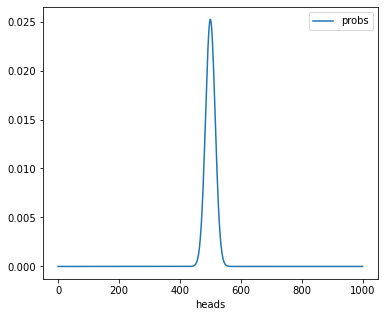

In [30]:
heads = np.linspace(0,1000,num=1001)
probs = binom.pmf(heads,1000,.5)
stat_exp_2 = pd.DataFrame({'heads':heads,'probs':probs})

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

stat_exp_2.plot.line(x='heads', y='probs',rot=0)

The CDF:

<AxesSubplot:xlabel='heads'>

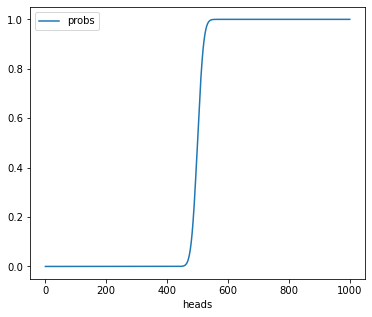

In [31]:
probs = binom.cdf(heads,1000,.5)
stat_exp_2 = pd.DataFrame({'heads':heads,'probs':probs})

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

stat_exp_2.plot.line(x='heads', y='probs')

Let's now switch to `P(H)=.75`

<AxesSubplot:xlabel='heads'>

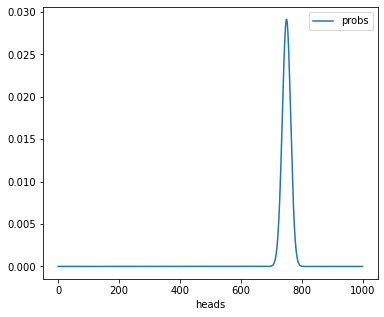

In [32]:
heads = np.linspace(0,1000,num=1001)
probs = binom.pmf(heads,1000,.75)
stat_exp_2 = pd.DataFrame({'heads':heads,'probs':probs})

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

stat_exp_2.plot.line(x='heads', y='probs')

- and we can see very nicely how the $mode(X)$ (the most frequently observed value in the distribution) has moved to 750 successes (Heads) out of 1000 trials.

In [33]:
stat_exp_2['heads'][stat_exp_2.idxmax()[1]]

750.0

The expected value (mean)

In [34]:
n = 1000
p = .75
mean = n*p
print(mean)

750.0


The variance

In [35]:
n = 1000
p = .75
q = 1-p
variance = n*p*q
print(variance)

187.5


Random number generation from the Binomial: 

- the statistical experiment is: toss a fair coin 1,000 times
- repeat the experiment 1,000 times.

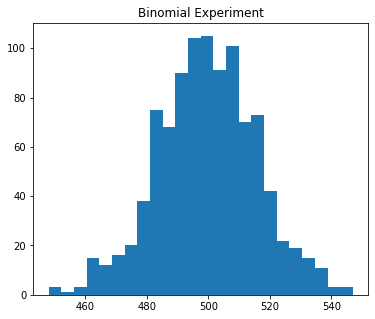

In [36]:
n = 1000
p = .5
rvs = binom.rvs(n,p,size=1000)

plt.hist(rvs, bins='auto')
plt.title("Binomial Experiment")

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

plt.show()


- repeat the experiment 100,000 times.

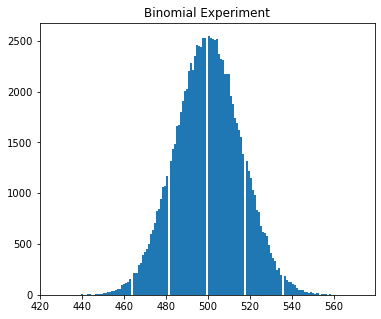

In [37]:
n = 1000
p = .5
rvs = binom.rvs(n,p,size=100000)
plt.hist(rvs, bins='auto')
plt.title("Binomial Experiment")

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

plt.show()

### The Normal (Gaussian) Distribution: $\mu$, $\sigma$

Back to school: what is the probability that a person is 185 cm tall if we draw her at random from a population with mean height = 178 cm, standard deviation = 15 cm...

In [38]:
from scipy.stats import norm

# - norm.pdf()
# - loc is mean
# - scale is standard deviation
p185cm = norm.pdf(185,loc=178, scale=15)
print(p185cm)

0.023852228611197936


No, it is not 0.02385223... that is the *probability density* scale! The normal distribution is **continuous**: it doesn't really make sense to ask for a probability of a data point from its domain. Try this: what is the probability that a person is between 180 cm and 185 cm tall if we draw a person at random from a population with mean height = 178 cm, standard deviation = 15 cm?

What should I do? Make a difference between two probability densities, substract one from another?

In [39]:
# - norm.cdf()
# - loc is mean
# - scale is standard deviation
p180_185cm = norm.pdf(185,loc=178,scale=15) - norm.pdf(180,loc=178,scale=15)
print(p180_185cm)

-0.0025085607811899113


Oh, no. Maybe:

In [40]:
p180_185cm = norm.cdf(185,loc=178,scale=15) - norm.cdf(180,loc=178,scale=15)
print(p180_185cm)

0.1265956924751156


That is correct: 0.1265957. Note the usage of `norm.pdf()` and `norm.cdf()` for density and the c.d.f. (short for: Cumulative Distribution Function) respectively, similar to any other probability function in scipy.

Gaussian, the bell curve, the Normal Distribution:

$$f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ is the distribution mean, $\sigma^2$ its variance, **and be very, very careful to notice** how scipy's functions for the normal distribution use $\sigma$ - the *standard deviation* instead of variance:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}}$$

Interesting: both the Binomial and the Gaussian functions describe random variables and refer to probability, but obviously they do so in a different manner. Why? 

At this point, we need to discuss the difference between **discrete** and **continuous probability functions** a bit:

<img src="../img/probability_functions.jpeg" style="width: 800px;"/>


Let's plot a set of Gaussians with different $\mu$ and $\sigma$ parameters:

- $\mu$=100, $\sigma$=15

<AxesSubplot:xlabel='x'>

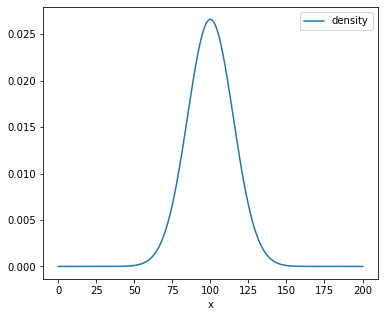

In [41]:
mu=100
sigma=15
x=np.linspace(0,200,1000)
gaussian = pd.DataFrame(
    {'x':x, 
    'density':norm.pdf(x, loc=mu,scale=sigma)})

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

gaussian.plot.line(x='x',y='density')

- $\mu$=50, $\sigma$=30

<AxesSubplot:xlabel='x'>

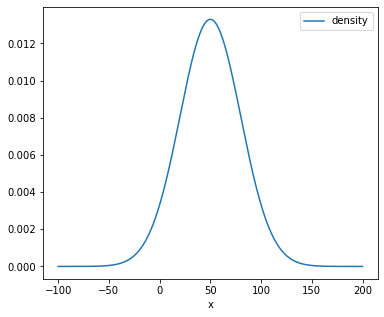

In [42]:
mu=50
sigma=30
x=np.linspace(-100,200,1000)
gaussian = pd.DataFrame(
    {'x':x, 
    'density':norm.pdf(x, loc=mu,scale=sigma)})

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

gaussian.plot.line(x='x',y='density')

- $\mu$=50, $\sigma$=10

<AxesSubplot:xlabel='x'>

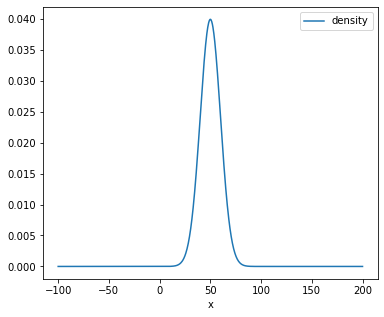

In [43]:
mu=50
sigma=10
x=np.linspace(-100,200,1000)
gaussian = pd.DataFrame(
    {'x':x, 
    'density':norm.pdf(x, loc=mu,scale=sigma)})

# - matplotlib figure size
plt.rcParams['figure.figsize'] = [6, 5]

gaussian.plot.line(x='x',y='density')

Gaussian Likelihood

- **Data.** We observe three data points: 175, 178, 181.
- **Q.** Which Normal distribution is more likely to have produced this data:
   - the one with $\mu$=176 and $\sigma$=5,
   - or the one with $\mu$=183 and $\sigma$=3?

Let's see:

In [44]:
data = [175,178,181]
l1 = np.prod(norm.pdf(data,loc=176,scale=5))
print("l1=" + str(l1))
l2 = np.prod(norm.pdf(data,loc=184,scale=3))
print("l2=" + str(l2))
print("Is l1 > l2? " + str(l1>l2))

l1=0.00027876836974903406
l2=2.144396353182168e-06
Is l1 > l2? True


When we multiply normal densities to compute the likelihood, small numbers typically occur.
What if take their logarithms instead?

In [45]:
data = [175,178,181]
log_l1 = np.prod(np.log(norm.pdf(data,loc=176,scale=5)))
print("log_l1=" + str(log_l1))
log_l2 = np.prod(np.log(norm.pdf(data,loc=184,scale=3)))
print("log_l2=" + str(log_l2))
print("Is log_l1 > log_l2? " + str(log_l1>log_l2))

log_l1=-20.129997070198947
log_l2=-65.92104025658554
Is log_l1 > log_l2? True


And of course that we have the `logpdf()` method in `scipy.stats.norm`:

In [46]:
data = [175,178,181]
log_l1 = np.prod(norm.logpdf(data,loc=176,scale=5))
print("log_l1=" + str(log_l1))
log_l2 = np.prod(norm.logpdf(data,loc=184,scale=3))
print("log_l2=" + str(log_l2))
print("Is log_l1 > log_l2? " + str(log_l1>log_l2))

log_l1=-20.129997070198943
log_l2=-65.92104025658554
Is log_l1 > log_l2? True


### Covariance and Correlation

In [47]:
# - libs
from sklearn import datasets

# - import iris data
iris = pd.read_csv("../_data/iris.csv")
print(iris.head(10))
print(iris.shape)

   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)


It is not difficult to obtain the correlation coefficient from two vectors in `numpy`:

In [48]:
np.corrcoef(iris['sepal_length'], iris['petal_length'])

array([[1.        , 0.87175416],
       [0.87175416, 1.        ]])

`Numpy` will always return a full correlation matrix, so:

In [49]:
np.corrcoef(iris['sepal_length'], iris['petal_length'])[0,1]

0.8717541573048709

However, we now want to **understand** what the correlation coefficient really is. Intuitively, we say that it describes a relationship between two variables. The correlation coefficient - more precisely, the Pearson's correlation coefficient in our case - can very from `-1` to `+1`, describing a negative or positive, strong or week **linear relationship** between two variables.

You might have stumbled upon various formulas that compute this correlation coefficient. But it is easy to understand what it really us once we introduce a more elementary concept of **covariance** between two random variables.

**Covariance**. Given two random variables (RVs), $X$ and $Y$, their (sample) covariance is given by:

$$cov(X,Y) = E[(X-E[X])(Y-E[Y])] = \frac{(X-\bar{X})(Y-\bar{Y})}{N-1}$$

In [50]:
# - covariance
v1 = iris['sepal_length']
v2 = iris['petal_length']
# - the expected value of v1 (the mean of v1)
mean_v1 = v1.mean()
# - the expected value of v2 (the mean of v2)
mean_v2 = v2.mean()
diffs = (v1-mean_v1)*(v2-mean_v2)
cov = diffs.sum()/(v1.size-1)
print(cov)

1.273682326621924


Of course we have  `np.cov()` for covariance:

In [51]:
cov = np.cov(v1,v2,bias=True)
print(cov)

[[0.68112222 1.26519111]
 [1.26519111 3.09242489]]


The covariance of a variable with itself is its variance:

In [52]:
np.var(v1,ddof=1)

0.6856935123042505

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

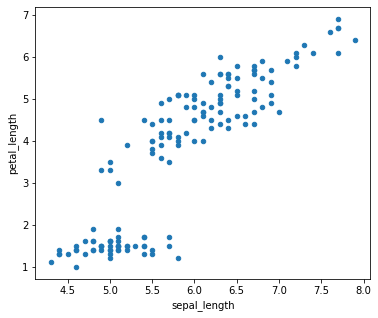

In [53]:
iris.plot.scatter(x="sepal_length",y="petal_length")

Enters `z-score`: the standardization of random variables.

Pearson's coefficient of correlation is nothing else than a covariance between $X$ and $Y$ upon their *standardization*. The standardization of a RV - widely known as a variable *z-score* - is obtained upon subtracting all of its values from the mean, and dividing by the standard deviation; for the **i**-th observation of $X$:

$$z(x_i) = \frac{x_i-\bar{X}}{\sigma}$$

In [54]:
# - standard deviation of v1
std_v1 = v1.std(ddof=1)
# - standard deviation of v2
std_v2 = v2.std(ddof=1)
# - v1 expressed as z-score
z_v1 = (v1-mean_v1)/std_v1
# - mean of z_v1 is now zero
print(np.round(z_v1.mean(),2))
# - v2 expressed as z-score
z_v2 = (v2-mean_v2)/std_v2
# - mean of z_v2 is now zero
print(np.round(z_v2.mean(),2))
# - covariance between z_v1 and z_v2
cov = np.cov(z_v1, z_v2,bias=True)
print(cov)

-0.0
-0.0
[[0.99333333 0.86594246]
 [0.86594246 0.99333333]]


Now Pearsons's correlation between `v1` and `v2`:

In [55]:
np.corrcoef(v1, v2)[0,1]

0.8717541573048709

So: Pearson's correlation coefficient is just the covariance between standardized variables.

Finally, to determine how much variance is shared between two variables, we square the correlation coefficient to obtain the coefficient of determination, $R^2$:

In [56]:
r2 = np.corrcoef(v1, v2)[0,1]**2
print(r2)

0.7599553107783257


We have already introduced some of the building blocks for the first model of statistical learning that we will discuss in the next session: *Simple Linear Regression*. 

In Simple Linear Regression, we discuss the model of the following functional form:

$$Y = \beta_0 + \beta_1X_1 + \epsilon $$

- $Y$ is the variable whose values we would like to be able to predict - and it is called a *criterion* or a *dependent variable* - from
- $X$, which is called a *predictor*, or an *independent variable* in the Simple Linear Regression setting;
- $\beta_0$ and $\beta_1$ are *model parameters*, of which the former represents the *intercept* while the later is the *slope* of the regression line (**note:** besides $\epsilon$, what the equation represents is nothing else but the equation of a straight line in a plane that you have seen a dozen times in high school); finally,
- $\epsilon$ represents the model error term, which we will discuss in length in our next session.

If we assume that the relationship between $X$ and $Y$ is indeed linear - and introduce some additional assumptions that we will discuss in our next session - the following question remains:

> What values of $\beta_0$ and $\beta_1$ would pick a line in a plane spawned by $X$ and $Y$ values so that it describes the assumed linear relationship between them the best?

### Intro Readings and Videos

- 

### Highly Recommended To Do

- Watch [Python NumPy Tutorial for Beginners](https://www.youtube.com/watch?v=QUT1VHiLmmI)
- Read chapter [Introduction to NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) from [Python Data Science Handbook, Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/)

<hr>

Goran S. Milovanović & Aleksandar Cvetković

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: <a href="https://www.gnu.org/licenses/gpl-3.0.txt">GPLv3</a> This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see <a href="http://www.gnu.org/licenses/">http://www.gnu.org/licenses/</a>.</font>